In [0]:
cd "/home/admin123/Документы/PROJECTS/IKEA/Stage 4 - Lapsed/"

/home/admin123/Документы/PROJECTS/IKEA/Stage 4 - Lapsed


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# from __future__ import (absolute_import, division,
#                         print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
# plt.rcParams["figure.figsize"] = (10, 6)
pd.options.display.max_columns = 190
pd.options.display.max_rows = 55

# Data pre-processing

In [0]:
def wam_parser(filepath):
    df = pd.read_csv(filepath, sep ='|', names=['v0','v2','v3'], usecols=['v0','v2','v3'])
    
    df.drop(df[(df.v2.isnull()) & (df.v3.isnull())].index, inplace=True)       # drop rows with only ID 
    df.drop(df[df.v3.isnull()].index, inplace=True)                            # drop rows with only soc-dem
    df.drop_duplicates(subset=['v0'], inplace=True)                            # drop duplicates 

    df.fillna('nan', inplace=True)                                               
    df['v4'] = ',' + df.v3 + ',' + df.v2      
    df = df.drop(['v2', 'v3'],axis=1)  
    v4_values = ','.join(list(df.v4.values))          # " a:1,b:4,a:2,c:7 ... "
    import re 
    cols = re.split(r'[:,]', v4_values)  # split by ',' and ':'
    dict2 = set(cols) - set(np.arange(1,21).astype('str')) - {''} - {'nan'}
    
    def str_extractor(key):
        vd = df.v4.str.extract('(,' + key + ':)' + '(\d+)')        # \d+ = "any digit"
        del vd[0]
        vd.columns = [key]
        return vd;

    for i in list(dict2):
        col_i = str_extractor(key = i)                  
        df = pd.concat([df, col_i], axis=1)          
        ;
        
    df = df.drop(['v4'], axis = 1)
    df = df.dropna(axis=1,how='all')          # removing columns (features) with all nan 
    return df

In [0]:
df_op = wam_parser('./lapsed.csv')

# Clustering

In [0]:
df = df_op[:500]

In [0]:
df_segmentation = df.drop('v0', axis=1)
df_segmentation.fillna(0, inplace=True)
df_segmentation = df_segmentation.astype(float)
df_segmentation = df_segmentation.drop(df_segmentation.columns[0], axis=1)
# df_segmentation.to_csv('./data/df_segmentation.csv', index=True)

In [0]:
df_segmentation.mean()

student                            9.544
Building and civil engineering     4.760
aged 65 and more                  10.020
Horse racing                       0.208
aged 25 to 34                     10.276
Science                            0.728
Savings                            0.514
Nature                             1.206
Family                             4.246
Computer Science                   0.076
Motorcycles and bicycles           0.550
Games consoles                     0.046
Comics                             8.244
Soccer                             3.050
Jewelry                            0.402
Law                                0.250
Energy                             1.004
Beauty products                    0.514
Pharmacy                           0.316
Entrepreneur                       0.704
retired                           12.052
aged 35 to 49                      9.804
Classical music & instruments      0.680
Video games                        0.192
Real estate     

In [0]:
from sklearn.decomposition import PCA
pca=PCA()
#The new representation of our points can be computed by using the .fit_transform() method
pca_representation=pca.fit_transform(df_segmentation)
print(pca_representation)

[[ -1.89792641e+01   3.46912155e+00   1.74624008e+00 ...,  -8.26140052e-02
    7.10671869e-16   1.09828845e-15]
 [ -1.37003028e+00   1.82405995e+00  -2.36149694e+00 ...,   1.46471390e+00
   -5.67782942e-16  -3.17485278e-16]
 [ -6.49801209e+00  -6.36334532e-01  -1.05031189e+01 ...,   2.62964355e-01
    1.05575335e-15  -1.01447399e-16]
 ..., 
 [ -1.99850074e+01  -8.19443351e+00   5.94529283e+00 ...,  -1.60452072e-01
    3.09231512e-16  -1.28903657e-16]
 [ -1.12836178e+01   7.60242763e+00   7.78720970e+00 ...,  -1.51878555e-01
   -2.46678174e-16   5.92747162e-16]
 [  1.03623741e+01   7.86784866e+00  -5.32847543e+00 ...,   6.19925631e-03
   -7.52168076e-17  -1.12412289e-16]]


In [0]:
print(pca.explained_variance_ratio_)

[  1.26049012e-01   1.00782851e-01   7.84935261e-02   6.48540590e-02
   4.52280277e-02   4.25739286e-02   3.98611617e-02   3.50179865e-02
   2.79298170e-02   2.74354835e-02   2.52356894e-02   2.23445138e-02
   1.96512706e-02   1.78517146e-02   1.69614789e-02   1.58902051e-02
   1.48671976e-02   1.40728292e-02   1.27381630e-02   1.21450116e-02
   1.15069564e-02   1.12842823e-02   1.10933352e-02   1.05719305e-02
   1.01737999e-02   9.86313326e-03   9.20998230e-03   8.88944093e-03
   8.50763058e-03   8.16194775e-03   7.57130820e-03   7.54079036e-03
   7.12168088e-03   6.79214868e-03   6.51719195e-03   6.07259305e-03
   6.03818546e-03   5.71977145e-03   5.34594265e-03   5.14459561e-03
   4.79114012e-03   4.59109302e-03   4.37300359e-03   4.09952620e-03
   3.96982648e-03   3.63807904e-03   3.47205188e-03   3.42977010e-03
   3.12560209e-03   3.02873388e-03   2.86813029e-03   2.71327110e-03
   2.51357594e-03   2.50086705e-03   2.40572281e-03   2.23196357e-03
   2.13211230e-03   2.06336194e-03

This array indicates that by keeping only one dimension, we keep only 16.7% of the variance of our whole dataset. It is equivalent to say that keeping only one dimension makes us lose 83.3% of the information.

By also keeping the second dimension, we add 14.2% of the variance. We thus keep almost 31% of the total variance

A very important thing to notice here is that PCA outputs the dimensions in a descending order with regard to the explained_variance. It can be simply understood this way:

-The first dimension of the PCA representation gives us the most realistic one-dimensional representation of our data. 

-The two first dimensions of the PCA representation gives us the most realistic two-dimensional representation of our data


In [0]:
#The cumulative sum of an array is implemented in numpy:
cumulative_variance_kept=np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance_kept)

[ 0.12604901  0.22683186  0.30532539  0.37017945  0.41540748  0.4579814
  0.49784257  0.53286055  0.56079037  0.58822585  0.61346154  0.63580606
  0.65545733  0.67330904  0.69027052  0.70616073  0.72102792  0.73510075
  0.74783892  0.75998393  0.77149088  0.78277517  0.7938685   0.80444043
  0.81461423  0.82447736  0.83368735  0.84257679  0.85108442  0.85924637
  0.86681767  0.87435846  0.88148015  0.88827229  0.89478949  0.90086208
  0.90690026  0.91262004  0.91796598  0.92311057  0.92790171  0.93249281
  0.93686581  0.94096534  0.94493516  0.94857324  0.9520453   0.95547507
  0.95860067  0.9616294   0.96449753  0.9672108   0.96972438  0.97222525
  0.97463097  0.97686293  0.97899504  0.98105841  0.98292655  0.98467956
  0.98635235  0.98790158  0.98927767  0.99062084  0.99186159  0.99301223
  0.99389119  0.99471834  0.99547686  0.9961436   0.99673239  0.99727463
  0.9977526   0.99816668  0.99851829  0.99883787  0.99911302  0.9993383
  0.99951078  0.99965281  0.99978152  0.99987762  0.9

In [0]:
#Re-instantiate the PCA object to keep only the dimensions providing more than 85% of explained variance ratio
pca=PCA(n_components=0.9)

#Re-transform the original dataset (df_segmentation) with the new PCA object
pca_representation=pca.fit_transform(df_segmentation)

print('shape before PCA: '+str(df_segmentation.shape))
print('size of the new representation: '+str(pca_representation.shape))

shape before PCA: (500, 87)
size of the new representation: (500, 36)


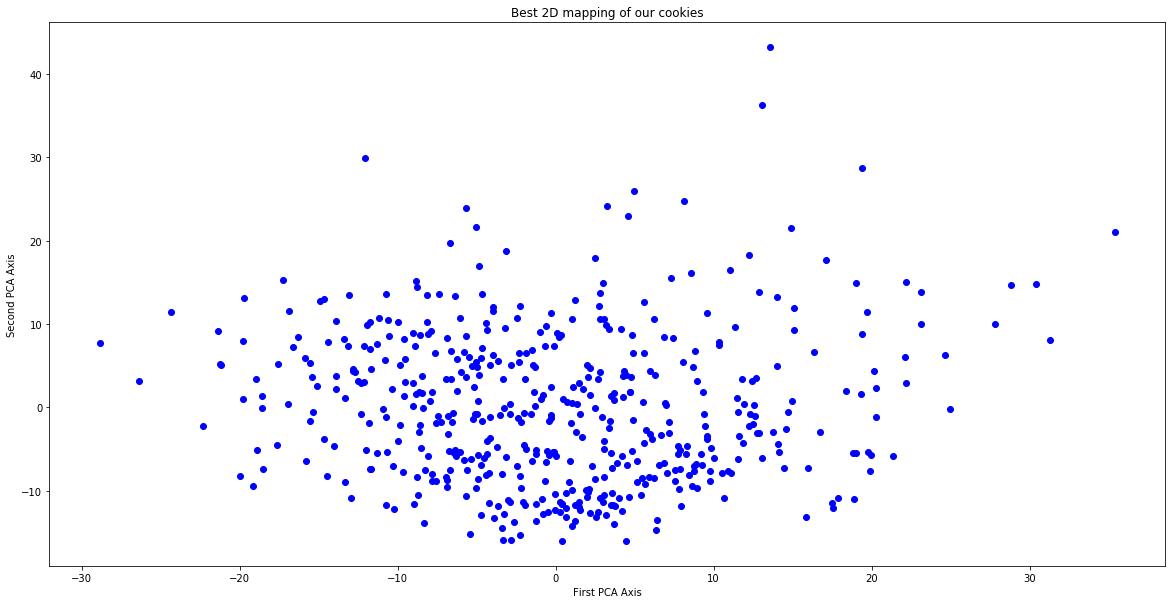

In [0]:
fig,ax=plt.subplots(figsize=(20, 10))
ax.scatter(pca_representation[:,0],pca_representation[:,1],c='blue')
ax.set_xlabel('First PCA Axis')
ax.set_ylabel('Second PCA Axis')
ax.set_title('Best 2D mapping of our cookies')
plt.show()

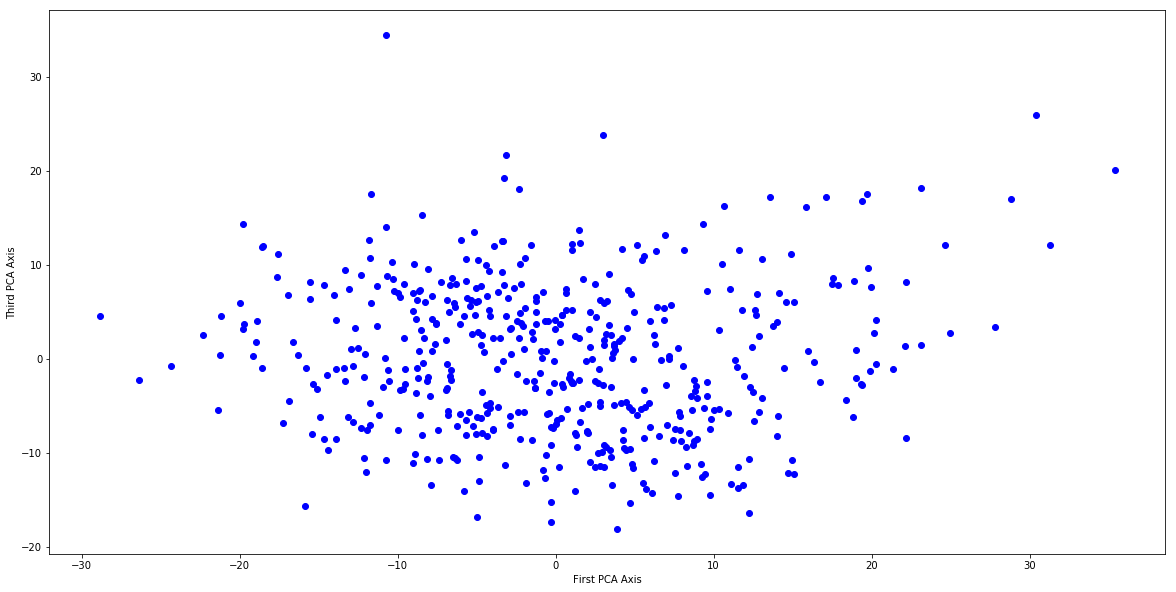

In [0]:
fig,ax=plt.subplots(figsize=(20, 10))
ax.scatter(pca_representation[:,0],pca_representation[:,2],c='blue')
ax.set_xlabel('First PCA Axis')
ax.set_ylabel('Third PCA Axis')
plt.show()

### CLUSTERING THE COOKIES WITH HC

In [0]:
class HierarchicalClustering:
    
    #Instantiate the object and computes the distance matrix between the points 
    def __init__(self,dataset,method_param='ward',metric_param='euclidean'):

        #faster implementation than scipy 
        from fastcluster import  linkage_vector
        from scipy.spatial.distance import pdist

        self.Z = linkage_vector(dataset,method=method_param,metric=metric_param)

    #plot the dendrogram of the hierarchical clustering
    def dendrogram(self,max_group=10):
        from scipy.cluster.hierarchy import dendrogram
        import matplotlib.pyplot as plt
        fig,ax=plt.subplots(figsize=(10,20))
        ax.set_title("Dendrogram")
        dendrogram(self.Z,orientation='top',truncate_mode='lastp', p=max_group,show_contracted=True)
        plt.show()


    #  Outputs the group of each point k: cluster_numbers
    def groups(self,k):
        from scipy.cluster.hierarchy import fcluster
        #cluster hierarchy by using loadings of ACP
        groupes_cah = fcluster(self.Z,k,criterion='maxclust')
        return groupes_cah

In [0]:
hc=HierarchicalClustering(pca_representation)

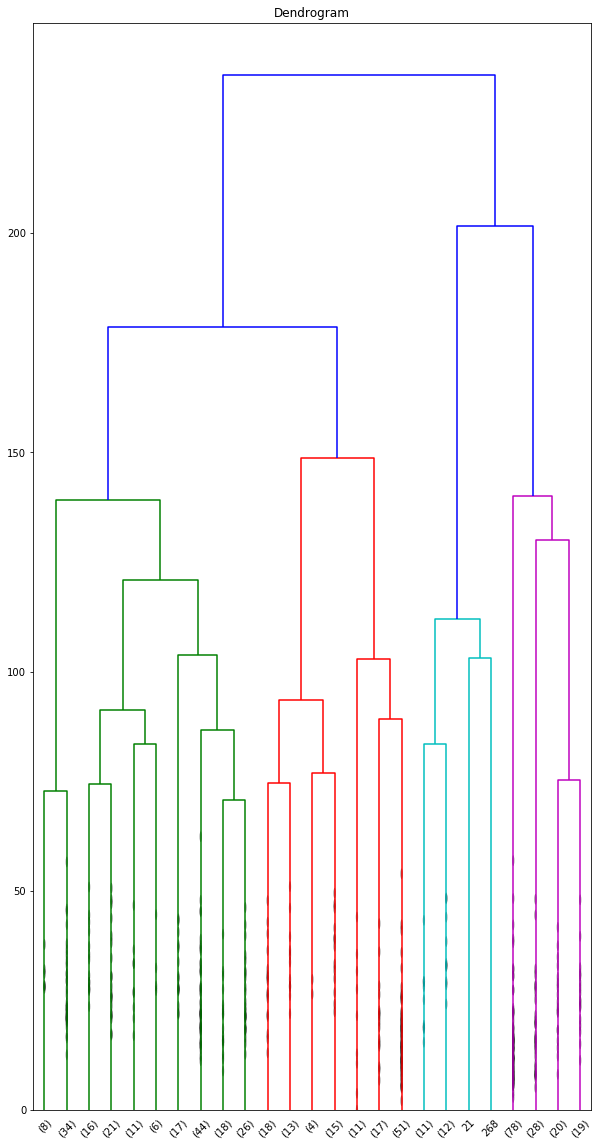

In [0]:
hc.dendrogram(max_group=25)

In [0]:
#apply the .groups() method to the HierarchicalClustering object to perform the segmentation
clusters_predicted_5=hc.groups(6)

In [0]:
print(clusters_predicted_5)

[1 1 1 5 3 4 5 2 3 1 2 6 4 3 1 1 5 6 1 1 5 4 1 3 6 1 2 6 5 1 5 3 1 3 3 1 4
 1 3 1 5 5 3 6 5 1 2 1 3 6 3 3 5 6 5 6 5 5 1 6 5 2 3 6 5 6 5 6 3 1 3 6 5 1
 1 6 1 1 4 6 5 1 1 6 6 3 5 1 3 1 1 1 6 3 6 5 1 5 1 1 1 4 3 6 1 1 1 1 1 6 1
 2 3 3 5 5 6 4 1 2 5 6 6 1 6 1 6 3 5 2 3 5 3 1 1 1 2 1 1 1 5 4 3 1 5 1 2 1
 5 1 1 2 2 1 3 5 3 3 4 1 3 1 5 1 1 1 1 2 2 3 1 5 3 6 1 1 5 5 1 1 3 3 1 1 6
 3 6 5 1 1 1 2 3 5 5 3 3 3 5 1 5 1 3 1 1 3 2 6 5 5 5 1 1 1 1 2 1 2 3 2 1 2
 3 3 1 1 2 1 1 1 1 6 5 3 2 4 1 6 2 5 6 1 1 1 1 1 1 2 5 3 3 1 1 1 1 3 3 5 6
 1 1 3 3 1 1 1 6 1 4 1 5 1 5 1 5 3 5 5 1 5 5 1 1 1 2 1 6 1 1 2 3 1 1 5 5 1
 1 1 4 3 1 4 1 5 5 3 5 5 1 6 1 3 1 1 1 1 1 6 2 1 5 4 1 4 1 6 1 1 5 3 1 1 1
 2 5 3 2 1 5 3 1 2 6 6 2 1 4 6 5 2 1 6 3 1 6 1 1 5 4 1 2 6 6 1 5 1 1 1 3 6
 1 5 1 3 1 3 1 1 1 5 1 6 1 5 5 3 1 1 3 1 6 1 1 6 6 3 3 1 1 1 1 1 1 2 3 1 5
 4 2 3 1 5 1 6 2 2 6 2 1 5 6 3 1 3 6 1 4 3 4 1 4 1 1 1 3 6 6 2 2 1 1 1 2 1
 2 3 1 1 1 3 1 4 1 1 5 5 2 2 1 4 1 6 6 3 3 6 2 1 1 4 2 6 2 6 6 1 5 3 1 2 1
 6 4 5 5 1 6 1 3 2 1 6 1 

In [0]:
def group_proportions(groupes_cah):
    L=[]
    p=[]
    clus=[]
    for i in np.unique(groupes_cah):
        L.append(list(groupes_cah).count(i))
        p.append(float(L[i-1])/len(groupes_cah))
        clus.append(i)
    ddd=pd.DataFrame({'cluster':clus,'count':L,'ratio':p})
    ddd=ddd.set_index('cluster')
    return ddd

In [0]:
group_proportions(clusters_predicted_5)

,count,ratio
cluster,,
1,201,0.402
2,50,0.100
3,79,0.158
4,25,0.050
5,78,0.156
6,67,0.134


In [0]:
def show2d(data,clusters,a=0,b=1):
    import matplotlib.patches as mpatches
    colors={}
    colors_list=["#40b8ef","#fcac00","#FF4A46","#008941","#FFDBE5","#A30059","#006FA6","#0000A6","#7A4900","#63FFAC","#B79762","#004D43","#8FB0FF","#997D87","#5A0007","#809693","#FEFFE6","#1B4400"]
    for i in range(len(colors_list)):
        colors[i+1]=colors_list[i]
        
    plt.figure(figsize=(20, 15))
    dfCloud=pd.DataFrame(dict(x=data[:,a], y=data[:,b], cluster=clusters))
    plt.scatter(dfCloud['x'],dfCloud['y'],marker='o',linewidths=0,s=20, c=dfCloud['cluster'].apply(lambda x: colors[x])) 

    n_cluster=int(dfCloud.cluster.unique().shape[0])
    class_colours=list(colors.values())[:n_cluster]
    classes=list(range(1,n_cluster+1))
    recs=[]
    for i in range(0,len(class_colours)):
        recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))

    plt.legend(recs,classes,loc='best')

    plt.show()

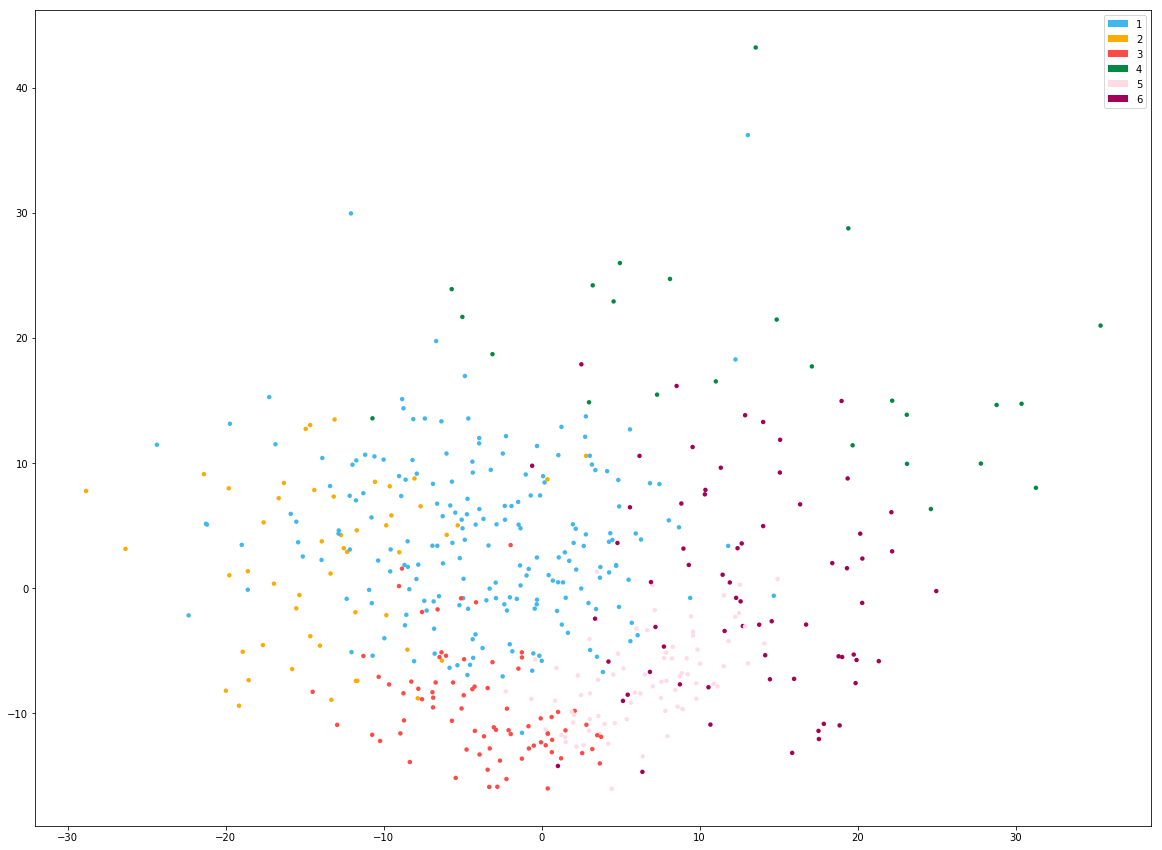

In [0]:
#Let's plot the points using the two first axis
show2d(pca_representation,clusters_predicted_5,a=0,b=1)

### to Excel

In [0]:
def clustDesc(original_dataframe,clusters_predicted,i):

    t1=original_dataframe[clusters_predicted==i].mean()
    t2=original_dataframe.mean()

    t4=t1/t2

    d= pd.DataFrame({'AVGCluster':t1,'AVG':t2, 'Uplift':t4}).sort_values(by='Uplift',ascending=False)
    
    #rearrangement
    cols=['AVGCluster','AVG','Uplift']
    d=d[cols]
    d.drop(d[(d.AVGCluster < 2.5) | (d.Uplift < 1.5)].index, inplace = True)

    return d

In [0]:
#Look the behavioral trends of the cookies which belong to the first group:

clustDesc(df_segmentation,clusters_predicted_5,1)

In [0]:
class ExcelWriter:
    def __init__(self,original_dataframe,clusters_predicted,filename):
        self.original_dataframe=original_dataframe
        self.clusters_predicted=clusters_predicted
        self.writer=pd.ExcelWriter(filename, engine='xlsxwriter')

    def create_file(self,verbose=True):
        if verbose:
            print("Creating excel file ...")

        n_cluster=np.unique(self.clusters_predicted).shape[0]

        group_proportions(self.clusters_predicted).to_excel(self.writer, sheet_name='Repartition')

        workbook  = self.writer.book
        worksheet = self.writer.sheets['Repartition']
        chart = workbook.add_chart({'type': 'doughnut'})
        chart.add_series({'values': '=Repartition!$C$2:$C$'+str(n_cluster+1),'data_labels': {'percentage': True}})
        worksheet.insert_chart('G2', chart)

        for i in range(1,n_cluster+1):
            label='C'+str(i)
            clustDesc(self.original_dataframe,self.clusters_predicted,i).to_excel(self.writer, sheet_name=label)

        self.writer.close()

        if verbose:
            print("Done")

        return

In [0]:
# Create an Excel file summarizing the segmentation with 5 clusters

#Name of the file you want to create
filepath='./results/clusters_6.xlsx'

#Create the ExcelWriter object
xls_writer=ExcelWriter(df_segmentation,clusters_predicted_5,filepath)

#Create the file
xls_writer.create_file()

In [0]:
# save other results...
clusters_predicted_5=hc.groups(5)
filepath='./results/clusters_5.xlsx'
xls_writer=ExcelWriter(df_segmentation,clusters_predicted_5,filepath)
xls_writer.create_file()
clusters_predicted_5=hc.groups(8)
filepath='./results/clusters_8.xlsx'
xls_writer=ExcelWriter(df_segmentation,clusters_predicted_5,filepath)
xls_writer.create_file()
clusters_predicted_5=hc.groups(12)
filepath='./results/clusters_12.xlsx'
xls_writer=ExcelWriter(df_segmentation,clusters_predicted_5,filepath)
xls_writer.create_file()
